# 01 - Exploratory Data Analysis (EDA)

Goal of this notebook:

- Inspect the merged hourly dataset (`base_hourly_2015_2024.parquet`)
- Understand demand patterns over time (hour, day, season)
- See how weather and events relate to demand


In [84]:
# Imports and config
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")
pd.set_option("display.max_columns", 50)


In [85]:
# Load data
DATA_PATH = "../data/processed/base_hourly_2015_2024.parquet"

df = pd.read_parquet(DATA_PATH)
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp").reset_index(drop=True)
# needed_columns = ["timestamp", "rides", "temperature_2m", "precipitation", "windspeed_10m", "is_rain","event_count", "has_event", "heavy_event", "hour", "dayofweek", "is_weekend", "is_holiday"]

# df = df[needed_columns]
# df["year"] = df["timestamp"].dt.year
# df["month"] = df["timestamp"].dt.month
# df["day"] = df["timestamp"].dt.day
df.head()

# df.to_parquet(DATA_PATH, index=False)


,timestamp,rides,temperature_2m,precipitation,windspeed_10m,is_rain,event_count,has_event,heavy_event,hour,dayofweek,is_weekend,is_holiday,year,month,day
0,2015-01-01 00:00:00,28312,-3.8,0.0,14.1,0,4.0,1.0,1,0,3,0,1,2015,1,1
1,2015-01-01 01:00:00,31707,-3.9,0.0,14.1,0,8.0,1.0,1,1,3,0,1,2015,1,1
2,2015-01-01 02:00:00,28068,-4.0,0.0,14.7,0,7.0,1.0,1,2,3,0,1,2015,1,1
3,2015-01-01 03:00:00,24288,-4.0,0.0,15.6,0,4.0,1.0,1,3,3,0,1,2015,1,1
4,2015-01-01 04:00:00,17081,-4.0,0.0,16.1,0,4.0,1.0,1,4,3,0,1,2015,1,1


In [86]:
# Basic overview
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())


Shape: (87666, 16)

Columns:
 ['timestamp', 'rides', 'temperature_2m', 'precipitation', 'windspeed_10m', 'is_rain', 'event_count', 'has_event', 'heavy_event', 'hour', 'dayofweek', 'is_weekend', 'is_holiday', 'year', 'month', 'day']

Dtypes:
 timestamp         datetime64[us]
rides                      int64
temperature_2m           float64
precipitation            float64
windspeed_10m            float64
is_rain                    int64
event_count              float64
has_event                float64
heavy_event                int64
hour                       int32
dayofweek                  int32
is_weekend                 int64
is_holiday                 int64
year                       int32
month                      int32
day                        int32
dtype: object

Missing values per column:
timestamp         0
rides             0
temperature_2m    0
precipitation     0
windspeed_10m     0
is_rain           0
event_count       0
has_event         0
heavy_event       0
hour    

In [87]:
# Time coverage check
print("Min timestamp:", df["timestamp"].min())
print("Max timestamp:", df["timestamp"].max())

# Expected: 2015-01-01 to 2024-12-31


Min timestamp: 2015-01-01 00:00:00
Max timestamp: 2024-12-31 23:00:00


In [88]:
# Basic stats for key columns
key_cols = [
    "rides",
    "temperature_2m",
    "precipitation",
    "windspeed_10m",
    "event_count",
]

df[key_cols].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])


,rides,temperature_2m,precipitation,windspeed_10m,event_count
count,87666.000000,87666.000000,87666.000000,87666.000000,87666.000000
mean,8587.456197,12.417274,0.148167,13.018612,2216.033742
std,6887.654832,9.926503,0.686577,6.814905,3241.007137
min,2.000000,-20.600000,0.000000,0.000000,0.000000
5%,378.000000,-3.500000,0.000000,4.300000,0.000000
25%,2889.250000,4.500000,0.000000,7.900000,0.000000
50%,6403.000000,12.600000,0.000000,11.700000,121.000000
75%,14224.000000,20.800000,0.000000,16.900000,3873.000000
95%,21232.500000,27.400000,0.800000,26.000000,8125.750000
max,45849.000000,37.400000,33.800000,60.400000,29537.000000


## 1. Overall view of demand over time
Overall look at hourly rides over the whole period.


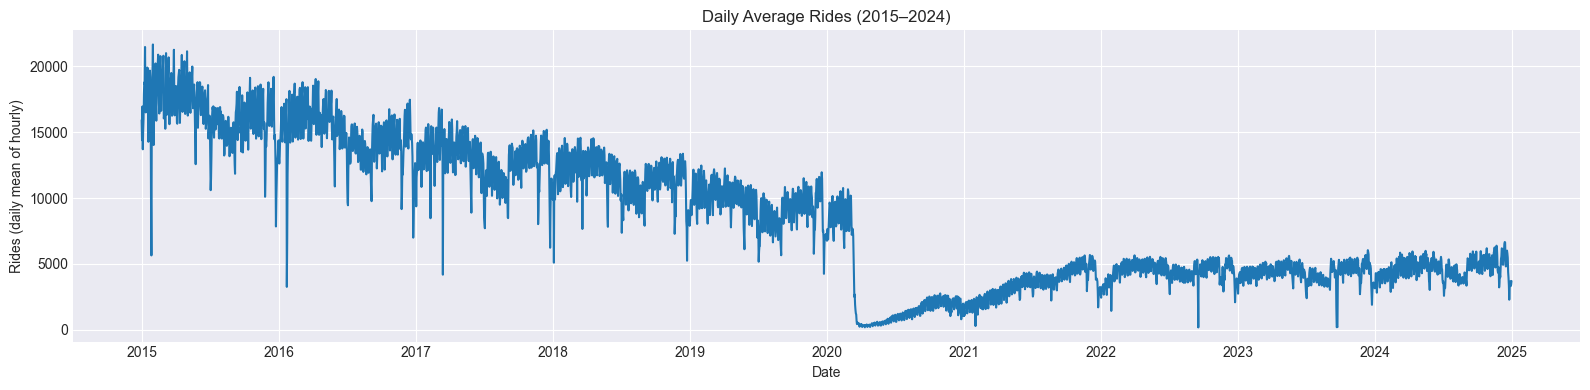

timestamp
2015-01-01    15917.250000
2015-01-02    14387.458333
2015-01-03    16948.791667
2015-01-04    13702.000000
2015-01-05    15121.958333
Freq: D, Name: rides, dtype: float64

In [89]:
df_daily = (
    df.set_index("timestamp")["rides"]
      .resample("D")
      .mean()  # used mean for readability
)

plt.figure(figsize=(16, 4))
plt.plot(df_daily.index, df_daily.values)
plt.title("Daily Average Rides (2015–2024)")
plt.xlabel("Date")
plt.ylabel("Rides (daily mean of hourly)")
plt.tight_layout()
plt.show()

df_daily.head()


## 2. Seasonality: hour-of-day and day-of-week patterns
Strong peaks expected in morning/evening commute hours and differences between weekdays/weekends.


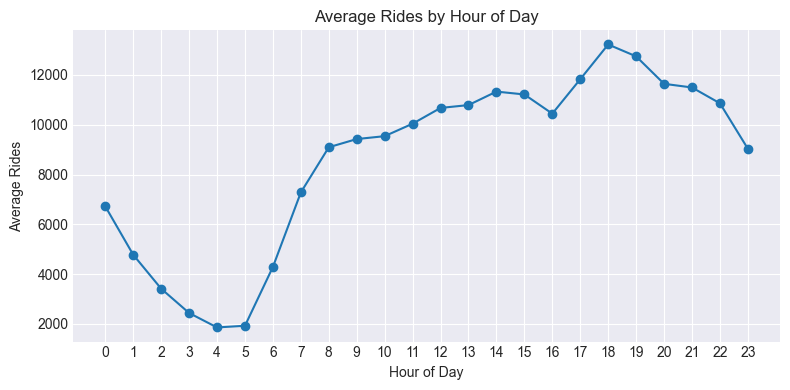

In [90]:
# Average rides by hour of day
hourly_mean = df.groupby("hour")["rides"].mean()

plt.figure(figsize=(8, 4))
plt.plot(hourly_mean.index, hourly_mean.values, marker="o")
plt.xticks(range(0, 24))
plt.title("Average Rides by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Rides")
plt.tight_layout()
plt.show()


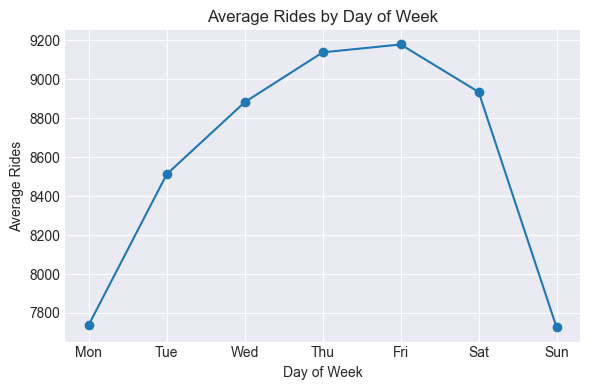

In [91]:
# Average rides by day of week
dow_mean = df.groupby("dayofweek")["rides"].mean()

plt.figure(figsize=(6, 4))
plt.plot(dow_mean.index, dow_mean.values, marker="o")
plt.xticks(range(0, 7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title("Average Rides by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Rides")
plt.tight_layout()
plt.show()


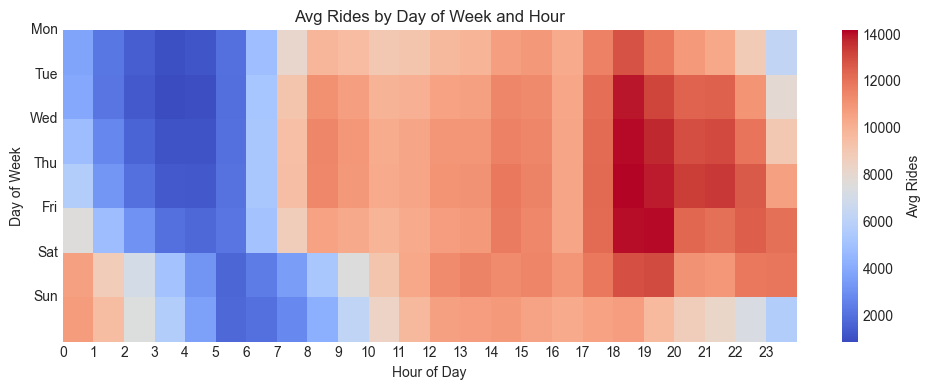

In [92]:
# Heatmap: hour-of-day vs day-of-week
pivot_hour_dow = df.pivot_table(
    index="dayofweek",
    columns="hour",
    values="rides",
    aggfunc="mean"
)

plt.figure(figsize=(10, 4))
sns.heatmap(
    pivot_hour_dow,
    cmap="coolwarm",
    annot=False,
    cbar_kws={"label": "Avg Rides"}
)
plt.yticks(
    range(0, 7),
    ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
    rotation=0
)

hours_list = [i for i in range(24)]

plt.xticks(range(0, 24), hours_list, rotation=0)
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.title("Avg Rides by Day of Week and Hour")
plt.tight_layout()
plt.show()

## 3. Yearly / monthly trends


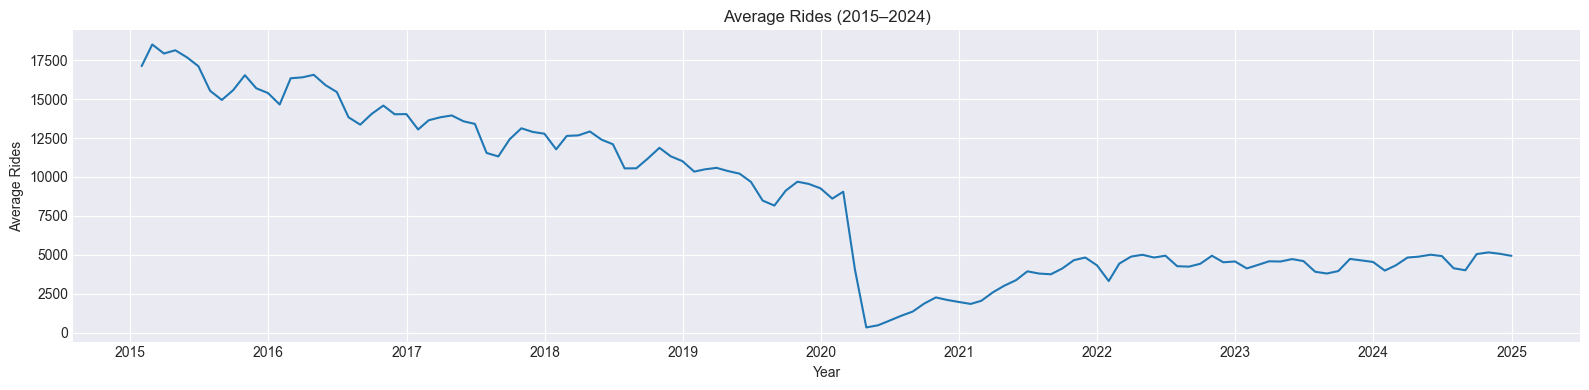

In [93]:
# Average rides over time
df_monthly = (
    df.set_index("timestamp")["rides"]
      .resample("ME")
      .mean()
      .reset_index()
)

plt.figure(figsize=(16, 4))
plt.plot(df_monthly["timestamp"], df_monthly["rides"])
plt.title("Average Rides (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Average Rides")
plt.tight_layout()
plt.show()


<Figure size 1000x400 with 0 Axes>

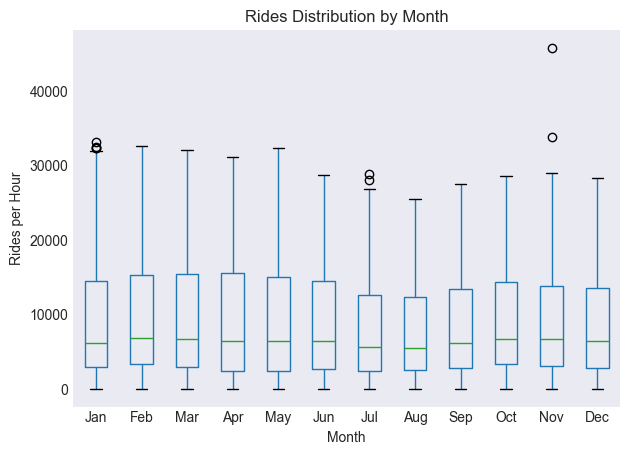

In [94]:
# Boxplot: rides by month

# Create ordered month names for better x-axis in boxplot
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df["month_name"] = pd.Categorical(
    df["month"].map({
        1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr",
        5: "May", 6: "Jun", 7: "Jul", 8: "Aug",
        9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
    }),
    categories=month_order,
    ordered=True
)

# Create the boxplot
plt.figure(figsize=(10, 4))
df.boxplot(column="rides", by="month_name", grid=False)
plt.title("Rides Distribution by Month")
plt.suptitle("")
plt.xlabel("Month")
plt.ylabel("Rides per Hour")
plt.tight_layout()
plt.show()


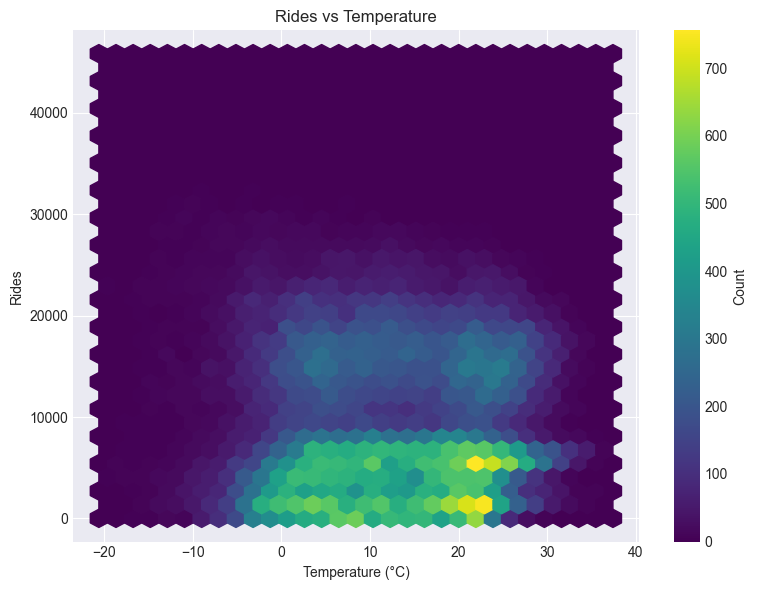

In [95]:
# Scatter: temperature vs rides
plt.figure(figsize=(8, 6))
plt.hexbin(df["temperature_2m"], df["rides"], gridsize=30, cmap="viridis")
plt.colorbar(label="Count")
plt.title("Rides vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Rides")
plt.tight_layout()
plt.show()


is_rain
0    8618.311579
1    8421.386139
Name: rides, dtype: float64


<Figure size 600x400 with 0 Axes>

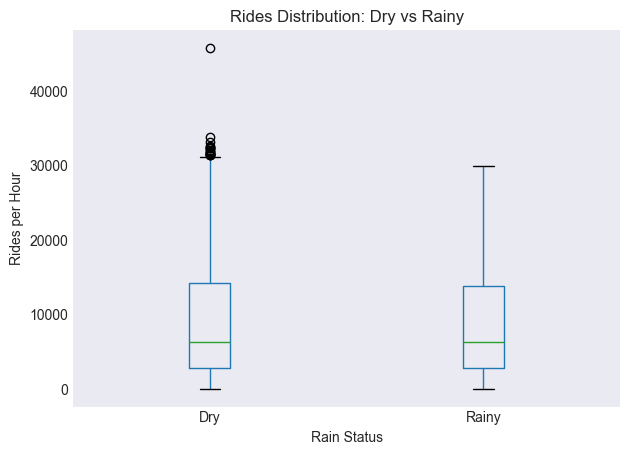

In [96]:
# Boxplot: rides in dry vs rainy hours
group_means = df.groupby("is_rain")["rides"].mean()
print(group_means)

# Map 0 to "Dry" and 1 to "Rainy"
df["rain_status"] = df["is_rain"].replace({0: "Dry", 1: "Rainy"})

plt.figure(figsize=(6, 4))
df.boxplot(column="rides", by="rain_status", grid=False)
plt.title("Rides Distribution: Dry vs Rainy")
plt.suptitle("")
plt.xlabel("Rain Status")
plt.ylabel("Rides per Hour")
plt.tight_layout()
plt.show()


## 5. Events vs demand
Check if hours with events have higher demand than non-event hours.


In [97]:
# Rides with vs without events
event_stats = df.groupby("has_event")["rides"].describe()
event_stats


,count,mean,std,min,25%,50%,75%,max
has_event,,,,,,,,
0.0,35063.0,4279.248553,2566.194888,17.0,1801.0,4752.0,6285.0,12757.0
1.0,52603.0,11459.130525,7352.118389,2.0,3929.0,12563.0,17145.0,45849.0


<Figure size 600x400 with 0 Axes>

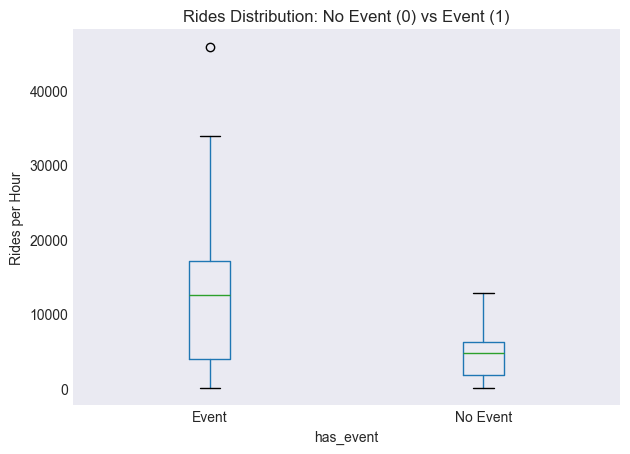

In [98]:
# Boxplot: has_event vs rides
df["event_status"] = df["has_event"].replace({0: "No Event", 1: "Event"})

plt.figure(figsize=(6, 4))
df.boxplot(column="rides", by="event_status", grid=False)
plt.title("Rides Distribution: No Event (0) vs Event (1)")
plt.suptitle("")
plt.xlabel("has_event")
plt.ylabel("Rides per Hour")
plt.tight_layout()
plt.show()


## 7. Findings Summary

---

### 1. Long-Term Demand Trend (2015 - 2024)

- 2015 - 2019: High, stable demand (~14k-18k avg hourly rides per day).
- Early 2020: COVID caused a sudden, almost total collapse.
- 2021 - 2024: Slow recovery, stabilizing around 4-5.5k avg rides/hour (much lower than Pre-COVID).

**Insight:** The pandemic caused a permanent change in demand. Models must treat pre- and post-COVID as two different eras.

### 2. Hour-of-Day Pattern (Strong Daily Seasonality)

- Lowest demand: 3 - 5 AM.
- Morning peak: 6 - 9 AM (commute).
- Midday is stable: 10 - 16 PM.
- Highest demand: 17 – 19 PM (evening commute).
- Decline after 8 PM.

**Insight:** NYC ride demand follows a predictable bi-modal commute curve.

### 3. Day-of-Week Pattern (Weekly Seasonality)

- Monday: Lowest weekday demand.
- Rides climb through the week.
- Thursday and Friday are the strongest days.
- Saturday shifts later; Sunday drops sharply.

**Insight:** Weekly demand grows through the workweek, peaks Friday, then changes shape on weekends.

### 4. Combined Day and Hour Patterns

- The classic "two rush hours" pattern is a weekday phenomenon.
- On weekends, the morning peak vanishes and the evening one shifts later.

**Insight:** Daily and weekly seasonality interact strongly, which makes them important for forecasting.

### 5. Monthly Patterns

- Pre-COVID (2015 - 2019): Summer months (Jun - Aug) have lower ride volumes, NOT higher.
- Winters appear slightly higher then.
- Seasonal variation exists but is weaker than daily/weekly effects.
- COVID year (2020) collapses demand across all months.
- Post-COVID monthly variance becomes flatter.

**Insight:** NYC yellow taxi demand drops in summer - likely because of tourism, heat, and residents leaving the city.

### 6. Rides vs Temperature
- Most rides occur between 0°C and ~25°C.
- Extremely cold/hot temperatures do not drastically change demand.
- Slight bump at temps ~20°C, but overall weak trend.

**Insight:** Temperature has only a small effect on rides.

### 7. Dry vs Rainy

- Rainy hours show a slightly higher average demand, but the difference isn't massive.

**Insight:** Rain impacts demand but not massively in this dataset. Weather still matters, but it’s not a main driver.

### 8. Event vs No Event

- Hours with events show significantly higher mean rides.

**Insight:** Events consistently make ride demand higher, making the "has_event" feature a valuable addition for forecasting models.

---

### Overall Conclusion

The main demand drivers are:
- Time-of-day and day-of-week (the strongest, most predictable patterns).
- The COVID turning point (defining the 'era' of demand).
- Events (strong driver of demand).
- Weather and monthly factors (present, but with a weaker influence).

